In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
df=pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [2]:
report=ProfileReport(df,title="EDA with pandas profiling")
report

'report=ProfileReport(df,title="EDA with pandas profiling")\nreport'

In [3]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [4]:
df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean(),inplace=True)
df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean(),inplace=True)

In [5]:
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df["BALANCE"]=scaler.fit_transform(df[["BALANCE"]].values)
df["PAYMENTS"]=scaler.fit_transform(df[["PAYMENTS"]].values)
df.drop("CUST_ID",axis=1,inplace=True)

In [7]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
clust_labels=model.fit_predict(df)

In [8]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,0
1,0
2,0
3,0
4,0
...,...
8945,0
8946,0
8947,0
8948,0


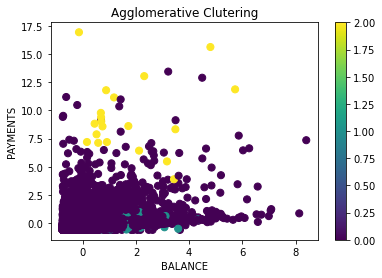

In [9]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (df ['BALANCE'] , df ["PAYMENTS"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel('BALANCE')
ax.set_ylabel("PAYMENTS")
plt.colorbar(scatter)

In [10]:
'''import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
dend=shc.dendrogram(shc.linkage(df,method="complete"))'''

'import scipy.cluster.hierarchy as shc\nplt.figure(figsize=(10,7))\ndend=shc.dendrogram(shc.linkage(df,method="complete"))'

In [11]:
from sklearn.cluster import KMeans 
kmeans=KMeans(n_clusters=3, random_state=0)  
kmeans.fit(df)

KMeans(n_clusters=3, random_state=0)

In [12]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,0
1,1
2,1
3,1
4,0
...,...
8945,0
8946,0
8947,0
8948,0


In [13]:
kmeans.predict(df)
print(kmeans.cluster_centers_) 

[[-3.10758952e-01  8.56988500e-01  6.09684168e+02  3.15813220e+02
   2.94134697e+02  5.31980225e+02  4.65105544e-01  1.50016395e-01
   3.53022416e-01  1.11961249e-01  2.39283450e+00  1.07010146e+01
   2.57570759e+03 -2.31864146e-01  6.51406664e+02  1.51227495e-01
   1.14237476e+01]
 [ 7.03661001e-01  9.22117231e-01  1.27840124e+03  7.75590408e+02
   5.03223954e+02  2.12516104e+03  5.26117444e-01  2.98396899e-01
   3.69554520e-01  1.98124275e-01  5.50040388e+00  1.92548465e+01
   8.88090028e+03  3.79583206e-01  1.29767895e+03  1.46963272e-01
   1.17285945e+01]
 [ 1.31327006e+00  9.79079970e-01  1.18522534e+04  8.37230620e+03
   3.47994723e+03  8.63050992e+02  9.16173783e-01  7.64229663e-01
   7.21878422e-01  7.67068072e-02  2.19277108e+00  9.92530120e+01
   1.19798193e+04  3.14910249e+00  2.48507368e+03  3.48927729e-01
   1.19216867e+01]]


In [14]:
df1=pd.concat([df,labels],axis=1)
df1=df1.rename(columns={0:"labels"})
df1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,labels
0,-0.731989,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,-0.528979,139.509787,0.000000,12,0
1,0.786961,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,0.818642,1072.340217,0.222222,12,1
2,0.447135,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,-0.383805,627.284787,0.000000,12,1
3,0.049099,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,-0.598688,864.206542,0.000000,12,1
4,-0.358775,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,-0.364368,244.791237,0.000000,12,0


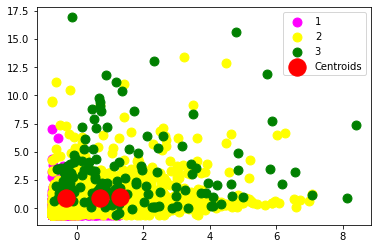

In [15]:
plt.scatter(df1["BALANCE"][df1.labels == 0],          
            df1["PAYMENTS"][df1.labels == 0],s=80,c='magenta',label='1')
plt.scatter(df1["BALANCE"][df1.labels == 1],
           df1["PAYMENTS"][df1.labels == 1],s=80,c='yellow',label='2')
plt.scatter(df1["BALANCE"][df1.labels == 2],
           df1["PAYMENTS"][df1.labels == 2],s=80,c='green',label='3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.legend()
plt.show()

In [16]:
kmeans=KMeans(n_clusters=2, random_state=0)  
kmeans.fit(df)
label=pd.DataFrame(kmeans.labels_)
label


,0
0,0
1,1
2,1
3,1
4,0
...,...
8945,0
8946,0
8947,0
8948,0


In [17]:
kmeans.predict(df)
print(kmeans.cluster_centers_)

[[-2.79228157e-01  8.59289758e-01  6.04446479e+02  3.14294934e+02
   2.90446130e+02  5.84856523e+02  4.60442447e-01  1.51221243e-01
   3.47494751e-01  1.16731412e-01  2.54754346e+00  1.06264550e+01
   2.73736822e+03 -2.19289409e-01  6.62352985e+02  1.48632797e-01
   1.14373394e+01]
 [ 7.91046791e-01  9.28210383e-01  2.13287786e+03  1.38040834e+03
   7.52785555e+02  2.09510516e+03  5.75079495e-01  3.47609312e-01
   4.12435302e-01  1.87307197e-01  5.23554604e+00  2.62779443e+01
   9.47221919e+03  6.21241732e-01  1.43605291e+03  1.68111415e-01
   1.17438972e+01]]


In [18]:
df2=pd.concat([df,label],axis=1)
df2=df2.rename(columns={0:"label"})
df2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,label
0,-0.731989,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,-0.528979,139.509787,0.000000,12,0
1,0.786961,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,0.818642,1072.340217,0.222222,12,1
2,0.447135,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,-0.383805,627.284787,0.000000,12,1
3,0.049099,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,-0.598688,864.206542,0.000000,12,1
4,-0.358775,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,-0.364368,244.791237,0.000000,12,0


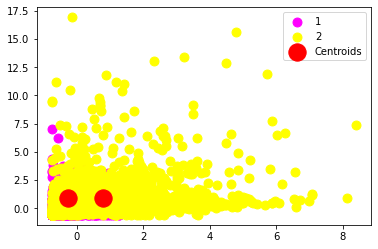

In [19]:
plt.scatter(df2["BALANCE"][df2.label == 0],          
            df2["PAYMENTS"][df2.label == 0],s=80,c='magenta',label='1')
plt.scatter(df2["BALANCE"][df2.label == 1],
           df2["PAYMENTS"][df2.label == 1],s=80,c='yellow',label='2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.legend()
plt.show()

In [20]:
sum_of_squared_dist=[]
K=range(1,15)
for k in K:
    km=KMeans(n_clusters=k)
    km=km.fit(df)
    sum_of_squared_dist.append(km.inertia_)

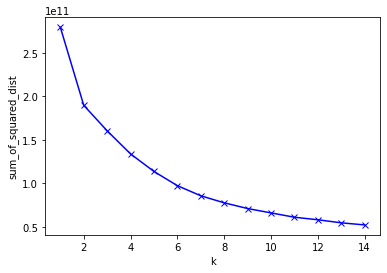

In [21]:
plt.plot(K,sum_of_squared_dist,'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_dist')
plt.show()

In [22]:
# as we can see the best k value is 2